In [645]:
from collections import Counter
import matplotlib.pyplot as plt
from datascience import *
from scipy import stats

import warnings
import numpy as np
import pandas as pd

low_memory = False
warnings.filterwarnings('ignore')

In [646]:
# Loading the csv files into the script 
aggregate = pd.read_csv("ExcessAutoVehicleAggregate.csv")
exposure = pd.read_csv("ExessAutoExposure.csv")
quoteDetail = pd.read_csv("QuoteDetail.csv")

# Section 1

In [647]:
#visualization of quotDetail table
quoteDetail

,id,status,version,createdAt,completedAt,updatedAt,deletedAt,quoteId
0,8075e246-54e8-4a0f-a6de-922aee95ada8,IN_PROGRESS,1,2022-02-28T16:19:56.957,NaN,2022-02-28T16:19:56.958,NaN,62723e36-5d97-47d7-a762-3e913194b1c7
1,936d29c1-3e16-43c0-a57b-606112274251,IN_PROGRESS,1,2022-02-28T16:56:58.128,NaN,2022-02-28T16:56:58.128,NaN,763b7b43-529c-4ab1-8839-f85922093a5d
2,85aba350-cb45-4022-b393-e7e1fff9d8c8,IN_PROGRESS,1,2022-02-28T18:47:59.18,NaN,2022-02-28T18:47:59.181,NaN,5aa538c7-685d-4ad0-9cb5-afd5ad65fdea
3,34002c42-c026-4e38-bfbf-c406afa0d4b8,IN_PROGRESS,1,2022-02-28T21:56:01.697,NaN,2022-02-28T21:56:01.698,NaN,c4e87309-4d59-4875-b7ea-3a93da50a1cd
4,daa541e2-772b-44e0-a1f2-0b1aa91a58f7,COMPLETED,1,2022-02-28T18:32:49.801,2022-02-28T23:09:26.548,2022-02-28T23:09:26.551,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330
...,...,...,...,...,...,...,...,...
417,5b374d29-fa48-4fe6-a67b-87fb7e0cca9a,IN_PROGRESS,11,2022-06-15T17:43:56.045,NaN,2022-06-15T17:43:56.081,NaN,34eaf48c-b3b9-465f-b061-914dcad7dfbe
418,8e605783-6569-4802-bd5d-d6301881263a,IN_PROGRESS,1,2022-06-15T20:50:05.13,NaN,2022-06-15T20:50:05.131,NaN,7e926f23-10a1-4898-b495-f238b91f87ac
419,1414d7de-dcac-4013-be46-8d7ac2f33d00,IN_PROGRESS,1,2022-06-15T20:51:31.75,NaN,2022-06-15T20:51:31.75,NaN,8752a284-7f01-4d10-8d32-eba6c3acecf7
420,c8d7990e-c8b7-432b-b3b0-22227ba3bd94,COMPLETED,5,2022-06-15T21:34:15.639,2022-06-15T21:43:46.846,2022-06-15T21:43:46.849,NaN,ed0245f0-a17c-4d8b-85c1-8c49486fe624


In [648]:
quoteDetail.dropna(subset=['completedAt'], inplace=True)
quoteDetail.sort_values(['createdAt'], inplace=True)
quoteDetail.drop_duplicates(['quoteId'], keep='last', inplace=True)
quoteDetail

,id,status,version,createdAt,completedAt,updatedAt,deletedAt,quoteId
7,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330
27,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199
74,b92e28da-050a-4695-ba9f-ecf0d9a57d2d,COMPLETED,1,2022-03-03T16:07:20.965,2022-03-11T04:48:39.464,2022-03-11T04:48:39.468,NaN,efec3405-1839-429c-823c-ab9b2db3bf00
40,00c3e57b-f994-460d-a0a9-d210e0270128,COMPLETED,6,2022-03-04T22:55:55.801,2022-03-04T23:17:09.02,2022-03-04T23:17:09.026,NaN,3962dd26-026c-45bf-9544-1d4bc262a374
76,fe774080-2c62-44c0-a5c8-2cd3f5ec6778,COMPLETED,5,2022-03-11T05:13:42.051,2022-03-11T05:14:00.191,2022-03-11T05:14:00.195,NaN,79f33b02-e678-4ebe-9ec1-02525a733210
102,94c59a6c-e74d-48d4-8f40-c84465297e7a,COMPLETED,14,2022-03-17T20:22:35.697,2022-03-17T20:25:04.136,2022-03-17T20:25:04.141,NaN,41adb354-5477-4066-b3ac-50a121c261a6
133,7301682b-612b-49ce-a8a8-e56811595349,COMPLETED,4,2022-03-23T19:14:57.561,2022-03-23T19:45:46.546,2022-03-23T19:45:46.552,NaN,e6203b94-7071-48c5-a34e-c8e8f9dad49c
154,8d8eb6c1-fac9-426a-aa45-93c74a49f356,COMPLETED,28,2022-03-29T21:00:44.215,2022-03-29T21:01:19.735,2022-03-29T21:01:19.739,NaN,0b18a7a3-8d9e-4913-aa84-1e931d89ef97
162,53fcbea8-7351-464f-b7f6-b975b0cc2ff2,COMPLETED,18,2022-04-01T17:17:40.384,2022-04-01T21:07:15.229,2022-04-01T21:07:15.233,NaN,1c0eef8c-7af8-426d-806f-c236dde5872f
175,a531bc8b-2126-41fa-bc89-13cd5f2c6303,COMPLETED,9,2022-04-13T22:40:29.982,2022-04-13T22:40:37.731,2022-04-13T22:40:37.736,NaN,b409e8f1-765d-45ff-89b1-418008c2a2d6


In [649]:
# 1. Write a SQL query to count the number of quoteIds in the quoteDetail table and 
# group by createdAt month. Which month had the most quotes?

# number of quoteID's that are completed and are the latest version.
# ans. 27

numQuoteID = len(quoteDetail)


#month with the most quotes.
# ans. march (3)
months = []
for i in range(0, len(quoteDetail)):
    months.append(quoteDetail['completedAt'].values[i][6:7])

maxFreqMonth = stats.mode(months)



# Section 2

In [650]:
#visualization of excessAutoExposure table
exposure

,id,quoteDetailId,createdAt,updatedAt,deletedAt,underlyingPolicyLimit,attachmentPoint
0,da7c99ae-4e8d-4c25-b54c-e66968ca8a35,daa541e2-772b-44e0-a1f2-0b1aa91a58f7,2022-02-28T18:32:49.802,2022-02-28T19:40:03.139,NaN,5000000.0,6000000.0
1,bdd67251-45a1-4c07-9215-09d75f50a356,8aea89cb-98ee-49b0-a09a-980df405c8e9,2022-02-28T23:16:38.596,2022-02-28T23:16:38.603,NaN,5000000.0,6000000.0
2,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,1b850a3a-212e-4010-814c-53eb03e41b1f,e43a8b29-badb-4a78-9641-68d4271081b2,2022-03-01T00:29:24.614,2022-03-01T01:32:40.223,NaN,5000000.0,6000000.0
4,3b7c7e1d-a550-419a-8b38-cc2c85528538,a41478d1-57eb-43a2-9cb7-056bf80f01b7,2022-03-01T18:06:25.405,2022-03-01T18:06:25.405,NaN,NaN,NaN
...,...,...,...,...,...,...,...
307,ece262d7-f7d8-4b6f-b257-ac0535940b72,79ad1425-b94e-4844-9df8-e76999fd35cd,2022-06-15T00:31:16.497,2022-06-15T00:31:16.525,NaN,10000000.0,12000000.0
308,75864738-a39c-43be-b367-5cb851e3bd5a,54ec6792-2aed-4807-a025-50696e84b284,2022-06-15T00:32:07.864,2022-06-15T00:32:07.907,NaN,10000000.0,12000000.0
309,f7e82869-518f-4fed-b10e-2ddeed7d0cec,79db7c13-8713-46cf-846a-efbc51e351e4,2022-06-14T23:25:26.47,2022-06-15T03:07:08.391,NaN,10000000.0,12000000.0
310,93cac0c6-f437-4387-ab20-ffbc2297209d,7f330b87-6b2a-4d61-8548-23dded6a1d63,2022-06-15T14:46:50.671,2022-06-15T14:46:50.691,NaN,10000000.0,12000000.0


In [651]:
# Sanity check of the table to ensure that no duplicate quoteIDs are provided.
exposure.drop_duplicates(['quoteDetailId'], keep='last', inplace=True)
exposure

,id,quoteDetailId,createdAt,updatedAt,deletedAt,underlyingPolicyLimit,attachmentPoint
0,da7c99ae-4e8d-4c25-b54c-e66968ca8a35,daa541e2-772b-44e0-a1f2-0b1aa91a58f7,2022-02-28T18:32:49.802,2022-02-28T19:40:03.139,NaN,5000000.0,6000000.0
1,bdd67251-45a1-4c07-9215-09d75f50a356,8aea89cb-98ee-49b0-a09a-980df405c8e9,2022-02-28T23:16:38.596,2022-02-28T23:16:38.603,NaN,5000000.0,6000000.0
2,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,1b850a3a-212e-4010-814c-53eb03e41b1f,e43a8b29-badb-4a78-9641-68d4271081b2,2022-03-01T00:29:24.614,2022-03-01T01:32:40.223,NaN,5000000.0,6000000.0
4,3b7c7e1d-a550-419a-8b38-cc2c85528538,a41478d1-57eb-43a2-9cb7-056bf80f01b7,2022-03-01T18:06:25.405,2022-03-01T18:06:25.405,NaN,NaN,NaN
...,...,...,...,...,...,...,...
307,ece262d7-f7d8-4b6f-b257-ac0535940b72,79ad1425-b94e-4844-9df8-e76999fd35cd,2022-06-15T00:31:16.497,2022-06-15T00:31:16.525,NaN,10000000.0,12000000.0
308,75864738-a39c-43be-b367-5cb851e3bd5a,54ec6792-2aed-4807-a025-50696e84b284,2022-06-15T00:32:07.864,2022-06-15T00:32:07.907,NaN,10000000.0,12000000.0
309,f7e82869-518f-4fed-b10e-2ddeed7d0cec,79db7c13-8713-46cf-846a-efbc51e351e4,2022-06-14T23:25:26.47,2022-06-15T03:07:08.391,NaN,10000000.0,12000000.0
310,93cac0c6-f437-4387-ab20-ffbc2297209d,7f330b87-6b2a-4d61-8548-23dded6a1d63,2022-06-15T14:46:50.671,2022-06-15T14:46:50.691,NaN,10000000.0,12000000.0


In [652]:
# 2. Write a SQL query to identify the minimum, maximum and modal (most common)
# attachmentPoint for all quotes year-to-date (YTD).

attachmentPointList = exposure['attachmentPoint'].values

# minimum attachmentPoint value ans. 2000000.0
minVal = min(attachmentPointList)

# maximum attachmentPoint value ans. 67000000.0
maxVal = max(attachmentPointList)

# modal attachmentPoint value ans. 12000000.0
c = Counter(attachmentPointList)
highest_freq = max(c.values())
modalVal =  [n for n, freq in sorted(c.items()) if freq == highest_freq]

In [653]:
exposure

,id,quoteDetailId,createdAt,updatedAt,deletedAt,underlyingPolicyLimit,attachmentPoint
0,da7c99ae-4e8d-4c25-b54c-e66968ca8a35,daa541e2-772b-44e0-a1f2-0b1aa91a58f7,2022-02-28T18:32:49.802,2022-02-28T19:40:03.139,NaN,5000000.0,6000000.0
1,bdd67251-45a1-4c07-9215-09d75f50a356,8aea89cb-98ee-49b0-a09a-980df405c8e9,2022-02-28T23:16:38.596,2022-02-28T23:16:38.603,NaN,5000000.0,6000000.0
2,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,1b850a3a-212e-4010-814c-53eb03e41b1f,e43a8b29-badb-4a78-9641-68d4271081b2,2022-03-01T00:29:24.614,2022-03-01T01:32:40.223,NaN,5000000.0,6000000.0
4,3b7c7e1d-a550-419a-8b38-cc2c85528538,a41478d1-57eb-43a2-9cb7-056bf80f01b7,2022-03-01T18:06:25.405,2022-03-01T18:06:25.405,NaN,NaN,NaN
...,...,...,...,...,...,...,...
307,ece262d7-f7d8-4b6f-b257-ac0535940b72,79ad1425-b94e-4844-9df8-e76999fd35cd,2022-06-15T00:31:16.497,2022-06-15T00:31:16.525,NaN,10000000.0,12000000.0
308,75864738-a39c-43be-b367-5cb851e3bd5a,54ec6792-2aed-4807-a025-50696e84b284,2022-06-15T00:32:07.864,2022-06-15T00:32:07.907,NaN,10000000.0,12000000.0
309,f7e82869-518f-4fed-b10e-2ddeed7d0cec,79db7c13-8713-46cf-846a-efbc51e351e4,2022-06-14T23:25:26.47,2022-06-15T03:07:08.391,NaN,10000000.0,12000000.0
310,93cac0c6-f437-4387-ab20-ffbc2297209d,7f330b87-6b2a-4d61-8548-23dded6a1d63,2022-06-15T14:46:50.671,2022-06-15T14:46:50.691,NaN,10000000.0,12000000.0


# Section 3

In [654]:
#visualization of excessAutoVehicleAggregate
ta1 = aggregate.join(exposure.set_index('id'), on= 'exposureId', lsuffix = '_left', rsuffix = '_right')
ta2 = quoteDetail.join(t1.set_index('quoteDetailId'), on= 'quoteId', lsuffix = '_left', rsuffix = '_right')
ta2 = t2.dropna(axis='columns', how='all')
ta2.drop(t2.columns.tolist()[0], axis = 1, inplace=True)
ta2 = t2.rename(columns={'createdAt_left' : 'createdAt'})
ta2

sizeClass                                                           level_0  \
state quoteId                              createdAt                          
CA    12cc76ce-dc8f-45c1-ad49-b7486cb5e330 2022-03-01T00:18:56.917        0   
                                           2022-03-01T00:18:56.917        1   
                                           2022-03-01T00:18:56.917        2   
                                           2022-03-01T00:18:56.917        3   
      b1e55b03-8e3a-42f3-813d-a2ccf379e199 2022-03-02T18:04:06.578        4   
...                                                                     ...   
      4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129      159   
FL    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129      160   
HI    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129      161   
                                           2022-06-16T00:11:09.129      162   
                                           2022-06-16T00:11:09.129      163   

sizeClass                                                           EXTRA_HEAVY_TRUCK  \
state quoteId                              createdAt                                    
CA    12cc76ce-dc8f-45c1-ad49-b7486cb5e330 2022-03-01T00:18:56.917                NaN   
                                           2022-03-01T00:18:56.917                NaN   
                                           2022-03-01T00:18:56.917                NaN   
                                           2022-03-01T00:18:56.917                NaN   
      b1e55b03-8e3a-42f3-813d-a2ccf379e199 2022-03-02T18:04:06.578                NaN   
...                                                                               ...   
      4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                NaN   
FL    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                NaN   
HI    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                NaN   
                                           2022-06-16T00:11:09.129                NaN   
                                           2022-06-16T00:11:09.129                NaN   

sizeClass                                                           EXTRA_HEAVY_TRUCK_TRACTOR  \
state quoteId                              createdAt                                            
CA    12cc76ce-dc8f-45c1-ad49-b7486cb5e330 2022-03-01T00:18:56.917                        NaN   
                                           2022-03-01T00:18:56.917                        NaN   
                                           2022-03-01T00:18:56.917                        NaN   
                                           2022-03-01T00:18:56.917                        NaN   
      b1e55b03-8e3a-42f3-813d-a2ccf379e199 2022-03-02T18:04:06.578                        NaN   
...                                                                                       ...   
      4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                        NaN   
FL    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                        NaN   
HI    4c782f83-527c-47af-8262-4f516d7bc06d 2022-06-16T00:11:09.129                        NaN   
                                           2022-06-16T00:11:09.129                        NaN   
                                           2022-06-16T00:11:09.129                        NaN   

sizeClass                                                           HEAVY_TRUCK  \
state quoteId                              createdAt                              
CA    12cc76ce-dc8f-45c1-ad49-b7486cb5e330 2022-03-01T00:18:56.917          NaN   
                                           2022-03-01T00:18:56.917          NaN   
                                           2022-03-01T00:18:56.917          NaN   
                                           2022-03-01T00:18:56.917          NaN   
      b1e55b03-8e3a-42f3-813d-a2ccf379e199 2022-03-02T

In [655]:
#visualization of excessAutoVehicleAggregate
ta1 = aggregate.merge(exposure, left_on='exposureId', right_on='id')
ta1
ta2 = quoteDetail.merge(t1,left_on='id', right_on= 'quoteDetailId')
ta2


,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [656]:
# Join Tables
ta2.groupby(['state','quoteId','createdAt', 'sizeClass'])
ta2

,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [657]:
# Generate a table which counts the number of vehicles in each sizeClass by state
# for each quoteId, and displays when the associated quoteDetail was created.

ta2 = ta2.set_index(['state','quoteId', 'createdAt', 'sizeClass'], append=True)['count'].unstack()

In [658]:
ta2

,,,sizeClass,EXTRA_HEAVY_TRUCK,EXTRA_HEAVY_TRUCK_TRACTOR,HEAVY_TRUCK,HEAVY_TRUCK_TRACTOR,LIGHT_TRUCK,MEDIUM_TRUCK,PRIVATE_PASSENGER_TYPE,TRAILERS
,state,quoteId,createdAt,,,,,,,,
0,CA,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,2022-03-01T00:18:56.917,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,CA,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,2022-03-01T00:18:56.917,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN
2,CA,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,2022-03-01T00:18:56.917,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
3,CA,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,2022-03-01T00:18:56.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,CA,b1e55b03-8e3a-42f3-813d-a2ccf379e199,2022-03-02T18:04:06.578,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
159,CA,4c782f83-527c-47af-8262-4f516d7bc06d,2022-06-16T00:11:09.129,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
160,FL,4c782f83-527c-47af-8262-4f516d7bc06d,2022-06-16T00:11:09.129,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
161,HI,4c782f83-527c-47af-8262-4f516d7bc06d,2022-06-16T00:11:09.129,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN


# Section 4

In [659]:
ta1 = aggregate.join(exposure.set_index('id'), on= 'exposureId', lsuffix = '_left', rsuffix = '_right')
ta2 = quoteDetail.join(t1.set_index('quoteDetailId'), on= 'quoteId', lsuffix = '_left', rsuffix = '_right')
ta2 = ta2.dropna(axis='columns', how='all')
ta2.drop(ta2.columns.tolist()[0], axis = 1, inplace=True)
ta2 = ta2.rename(columns={'createdAt_left' : 'createdAt'})
ta2

,status,version,createdAt,completedAt,updatedAt,quoteId
7,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,12cc76ce-dc8f-45c1-ad49-b7486cb5e330
27,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,b1e55b03-8e3a-42f3-813d-a2ccf379e199
74,COMPLETED,1,2022-03-03T16:07:20.965,2022-03-11T04:48:39.464,2022-03-11T04:48:39.468,efec3405-1839-429c-823c-ab9b2db3bf00
40,COMPLETED,6,2022-03-04T22:55:55.801,2022-03-04T23:17:09.02,2022-03-04T23:17:09.026,3962dd26-026c-45bf-9544-1d4bc262a374
76,COMPLETED,5,2022-03-11T05:13:42.051,2022-03-11T05:14:00.191,2022-03-11T05:14:00.195,79f33b02-e678-4ebe-9ec1-02525a733210
102,COMPLETED,14,2022-03-17T20:22:35.697,2022-03-17T20:25:04.136,2022-03-17T20:25:04.141,41adb354-5477-4066-b3ac-50a121c261a6
133,COMPLETED,4,2022-03-23T19:14:57.561,2022-03-23T19:45:46.546,2022-03-23T19:45:46.552,e6203b94-7071-48c5-a34e-c8e8f9dad49c
154,COMPLETED,28,2022-03-29T21:00:44.215,2022-03-29T21:01:19.735,2022-03-29T21:01:19.739,0b18a7a3-8d9e-4913-aa84-1e931d89ef97
162,COMPLETED,18,2022-04-01T17:17:40.384,2022-04-01T21:07:15.229,2022-04-01T21:07:15.233,1c0eef8c-7af8-426d-806f-c236dde5872f
175,COMPLETED,9,2022-04-13T22:40:29.982,2022-04-13T22:40:37.731,2022-04-13T22:40:37.736,b409e8f1-765d-45ff-89b1-418008c2a2d6


In [660]:
ta1 = aggregate.merge(exposure, left_on='exposureId', right_on='id')
ta2 = quoteDetail.merge(ta1,left_on='id', right_on= 'quoteDetailId')
ta2


,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [661]:
ta2.groupby(['state','quoteId','createdAt', 'sizeClass'])
ta2

,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [662]:
ta2 = ta2.filter(items=['createdAt', 'count'])
months = []

for i in range(0, len(ta2)):
    months.append(ta2['createdAt'].values[i][6:7])

ta2['createdAtMonth'] = months
ta2

,createdAt,count,createdAtMonth
0,2022-03-01T00:18:56.917,5,3
1,2022-03-01T00:18:56.917,23,3
2,2022-03-01T00:18:56.917,5,3
3,2022-03-01T00:18:56.917,2,3
4,2022-03-02T18:04:06.578,5,3
...,...,...,...
159,2022-06-16T00:11:09.129,5,6
160,2022-06-16T00:11:09.129,1,6
161,2022-06-16T00:11:09.129,6,6
162,2022-06-16T00:11:09.129,53,6


In [663]:
ta2 = ta2.groupby(['createdAtMonth'], as_index=False)['count'].mean()

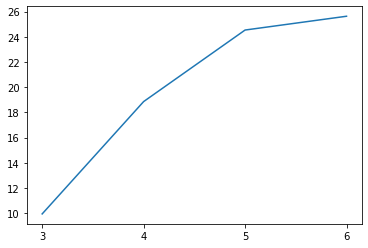

In [664]:
# Generate a chart which shows the average fleet size for each month of
# QuoteDetail createdAt - are fleets getting larger or smaller over time?

# ans. The average fleet sizes are getting larger over time as indicated by the rising average per month. Shown in the figure below.

x_val = ta2['createdAtMonth'].tolist()
y_val = ta2['count'].tolist()
plt.plot(x_val, y_val)
plt.show()

# Section 5

In [665]:
# Generate a chart which shows the breakdown of sizeClass of Californian autos for
# each month that data is available.

ta1 = aggregate.join(exposure.set_index('id'), on= 'exposureId', lsuffix = '_left', rsuffix = '_right')
ta2 = quoteDetail.join(t1.set_index('quoteDetailId'), on= 'quoteId', lsuffix = '_left', rsuffix = '_right')
ta2 = ta2.dropna(axis='columns', how='all')
ta2.drop(ta2.columns.tolist()[0], axis = 1, inplace=True)
ta2 = ta2.rename(columns={'createdAt_left' : 'createdAt'})
ta2

,status,version,createdAt,completedAt,updatedAt,quoteId
7,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,12cc76ce-dc8f-45c1-ad49-b7486cb5e330
27,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,b1e55b03-8e3a-42f3-813d-a2ccf379e199
74,COMPLETED,1,2022-03-03T16:07:20.965,2022-03-11T04:48:39.464,2022-03-11T04:48:39.468,efec3405-1839-429c-823c-ab9b2db3bf00
40,COMPLETED,6,2022-03-04T22:55:55.801,2022-03-04T23:17:09.02,2022-03-04T23:17:09.026,3962dd26-026c-45bf-9544-1d4bc262a374
76,COMPLETED,5,2022-03-11T05:13:42.051,2022-03-11T05:14:00.191,2022-03-11T05:14:00.195,79f33b02-e678-4ebe-9ec1-02525a733210
102,COMPLETED,14,2022-03-17T20:22:35.697,2022-03-17T20:25:04.136,2022-03-17T20:25:04.141,41adb354-5477-4066-b3ac-50a121c261a6
133,COMPLETED,4,2022-03-23T19:14:57.561,2022-03-23T19:45:46.546,2022-03-23T19:45:46.552,e6203b94-7071-48c5-a34e-c8e8f9dad49c
154,COMPLETED,28,2022-03-29T21:00:44.215,2022-03-29T21:01:19.735,2022-03-29T21:01:19.739,0b18a7a3-8d9e-4913-aa84-1e931d89ef97
162,COMPLETED,18,2022-04-01T17:17:40.384,2022-04-01T21:07:15.229,2022-04-01T21:07:15.233,1c0eef8c-7af8-426d-806f-c236dde5872f
175,COMPLETED,9,2022-04-13T22:40:29.982,2022-04-13T22:40:37.731,2022-04-13T22:40:37.736,b409e8f1-765d-45ff-89b1-418008c2a2d6


In [666]:
ta1 = aggregate.merge(exposure, left_on='exposureId', right_on='id')
ta2 = quoteDetail.merge(ta1,left_on='id', right_on= 'quoteDetailId')
ta2

,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [667]:
# Join Tables
ta2.groupby(['state','quoteId','createdAt', 'sizeClass'])
ta2

,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [668]:
ta2 = ta2.filter(items=['state', 'sizeClass', 'count', 'createdAt',])
ta2 = ta2.loc[ta2['state'] == 'CA'] 
ta2

,state,sizeClass,count,createdAt
0,CA,PRIVATE_PASSENGER_TYPE,5,2022-03-01T00:18:56.917
1,CA,LIGHT_TRUCK,23,2022-03-01T00:18:56.917
2,CA,MEDIUM_TRUCK,5,2022-03-01T00:18:56.917
3,CA,TRAILERS,2,2022-03-01T00:18:56.917
4,CA,PRIVATE_PASSENGER_TYPE,5,2022-03-02T18:04:06.578
5,CA,LIGHT_TRUCK,23,2022-03-02T18:04:06.578
6,CA,MEDIUM_TRUCK,5,2022-03-02T18:04:06.578
7,CA,TRAILERS,2,2022-03-02T18:04:06.578
90,CA,PRIVATE_PASSENGER_TYPE,3,2022-05-12T20:13:56.285
91,CA,HEAVY_TRUCK,163,2022-05-12T20:13:56.285


In [669]:
months = []
for i in range(0, len(ta2)):
    months.append(ta2['createdAt'].values[i][6:7])
ta2['createdAtMonth'] = months
ta2

,state,sizeClass,count,createdAt,createdAtMonth
0,CA,PRIVATE_PASSENGER_TYPE,5,2022-03-01T00:18:56.917,3
1,CA,LIGHT_TRUCK,23,2022-03-01T00:18:56.917,3
2,CA,MEDIUM_TRUCK,5,2022-03-01T00:18:56.917,3
3,CA,TRAILERS,2,2022-03-01T00:18:56.917,3
4,CA,PRIVATE_PASSENGER_TYPE,5,2022-03-02T18:04:06.578,3
5,CA,LIGHT_TRUCK,23,2022-03-02T18:04:06.578,3
6,CA,MEDIUM_TRUCK,5,2022-03-02T18:04:06.578,3
7,CA,TRAILERS,2,2022-03-02T18:04:06.578,3
90,CA,PRIVATE_PASSENGER_TYPE,3,2022-05-12T20:13:56.285,5
91,CA,HEAVY_TRUCK,163,2022-05-12T20:13:56.285,5


In [670]:
ta2 = ta2.groupby(['createdAtMonth', 'sizeClass'])['count'].sum().unstack()

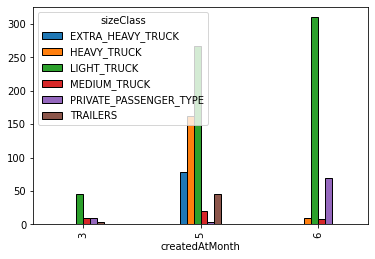

In [671]:
width = 0.35
col = ta2.columns.tolist()
ta2[col].plot(kind='bar', width = width)
plt.show()

# Section 6

In [672]:
ta1 = aggregate.join(exposure.set_index('id'), on= 'exposureId', lsuffix = '_left', rsuffix = '_right')
ta2 = quoteDetail.join(t1.set_index('quoteDetailId'), on= 'quoteId', lsuffix = '_left', rsuffix = '_right')
ta2 = ta2.dropna(axis='columns', how='all')
ta2.drop(ta2.columns.tolist()[0], axis = 1, inplace=True)
ta2 = ta2.rename(columns={'createdAt_left' : 'createdAt'})
ta2

,status,version,createdAt,completedAt,updatedAt,quoteId
7,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,12cc76ce-dc8f-45c1-ad49-b7486cb5e330
27,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,b1e55b03-8e3a-42f3-813d-a2ccf379e199
74,COMPLETED,1,2022-03-03T16:07:20.965,2022-03-11T04:48:39.464,2022-03-11T04:48:39.468,efec3405-1839-429c-823c-ab9b2db3bf00
40,COMPLETED,6,2022-03-04T22:55:55.801,2022-03-04T23:17:09.02,2022-03-04T23:17:09.026,3962dd26-026c-45bf-9544-1d4bc262a374
76,COMPLETED,5,2022-03-11T05:13:42.051,2022-03-11T05:14:00.191,2022-03-11T05:14:00.195,79f33b02-e678-4ebe-9ec1-02525a733210
102,COMPLETED,14,2022-03-17T20:22:35.697,2022-03-17T20:25:04.136,2022-03-17T20:25:04.141,41adb354-5477-4066-b3ac-50a121c261a6
133,COMPLETED,4,2022-03-23T19:14:57.561,2022-03-23T19:45:46.546,2022-03-23T19:45:46.552,e6203b94-7071-48c5-a34e-c8e8f9dad49c
154,COMPLETED,28,2022-03-29T21:00:44.215,2022-03-29T21:01:19.735,2022-03-29T21:01:19.739,0b18a7a3-8d9e-4913-aa84-1e931d89ef97
162,COMPLETED,18,2022-04-01T17:17:40.384,2022-04-01T21:07:15.229,2022-04-01T21:07:15.233,1c0eef8c-7af8-426d-806f-c236dde5872f
175,COMPLETED,9,2022-04-13T22:40:29.982,2022-04-13T22:40:37.731,2022-04-13T22:40:37.736,b409e8f1-765d-45ff-89b1-418008c2a2d6


In [673]:
ta1 = aggregate.merge(exposure, left_on='exposureId', right_on='id')
ta2 = quoteDetail.merge(ta1,left_on='id', right_on= 'quoteDetailId')
ta2

,id,status,version,createdAt,completedAt,updatedAt,deletedAt_x,quoteId,id_x,sizeClass,...,createdAt_x,updatedAt_x,exposureId,id_y,quoteDetailId,createdAt_y,updatedAt_y,deletedAt_y,underlyingPolicyLimit,attachmentPoint
0,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,64c6021d-fcd2-4a90-a5c0-526be7534c60,PRIVATE_PASSENGER_TYPE,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
1,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,4c674834-04f3-4abd-bc53-fe2c26bb3b93,LIGHT_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
2,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,eaa61e4a-a2a3-4c51-b224-23b99d1c5e37,MEDIUM_TRUCK,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
3,717b71ce-d33c-42a5-8ca5-96af1d20b787,COMPLETED,3,2022-03-01T00:18:56.917,2022-03-01T00:19:17.559,2022-03-01T00:19:17.563,NaN,12cc76ce-dc8f-45c1-ad49-b7486cb5e330,d7b6fd34-ad81-413e-baea-9f07f0e0ad01,TRAILERS,...,2022-03-01T00:19:04.138,2022-03-01T00:19:04.139,81b72b01-96ac-4f13-888b-2b88e8aa765b,81b72b01-96ac-4f13-888b-2b88e8aa765b,717b71ce-d33c-42a5-8ca5-96af1d20b787,2022-03-01T00:18:56.918,2022-03-01T00:19:11,NaN,5000000.0,6000000.0
4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,COMPLETED,6,2022-03-02T18:04:06.578,2022-03-02T18:04:08.381,2022-03-02T18:04:08.384,NaN,b1e55b03-8e3a-42f3-813d-a2ccf379e199,cfd09bda-8611-452e-b420-69a1bf1fa0b2,PRIVATE_PASSENGER_TYPE,...,2022-03-02T18:04:06.582,2022-03-02T18:04:06.589,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,92f67a35-fdb7-4e56-b4e9-97daf05da8a4,bc0cca05-860f-4eb8-a119-f52a0fc43fcd,2022-03-02T18:04:06.579,2022-03-02T18:04:06.589,NaN,10000000.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6a36c1ab-fa4d-4329-b843-e2cc71e22a79,HEAVY_TRUCK,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
160,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,6393e312-a7bf-42aa-bbb4-3d3d96eca930,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
161,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129,2022-06-16T03:17:40.073,2022-06-16T03:17:40.077,NaN,4c782f83-527c-47af-8262-4f516d7bc06d,69cc5bea-6b13-4f09-9639-1d462c9b6b90,PRIVATE_PASSENGER_TYPE,...,2022-06-16T00:11:09.149,2022-06-16T00:11:09.181,74c9d664-3e46-4890-b932-475755f3b476,74c9d664-3e46-4890-b932-475755f3b476,a00aae79-4669-4e86-a930-092279d7c737,2022-06-16T00:11:09.133,2022-06-16T00:29:31.68,NaN,5000000.0,12000000.0
162,a00aae79-4669-4e86-a930-092279d7c737,COMPLETED,1,2022-06-16T00:11:09.129

In [674]:
ta3 = ta2.filter(items=['state','sizeClass', 'count'])
ta4 =  ta2.filter(items=['state','sizeClass', 'count'])

ta3

,state,sizeClass,count
0,CA,PRIVATE_PASSENGER_TYPE,5
1,CA,LIGHT_TRUCK,23
2,CA,MEDIUM_TRUCK,5
3,CA,TRAILERS,2
4,CA,PRIVATE_PASSENGER_TYPE,5
...,...,...,...
159,CA,HEAVY_TRUCK,5
160,FL,PRIVATE_PASSENGER_TYPE,1
161,HI,PRIVATE_PASSENGER_TYPE,6
162,HI,LIGHT_TRUCK,53


In [675]:
ta3 = ta3.groupby(['state'], as_index=False)['count'].sum()
ta3.sort_values(by=['count'], inplace=True, ascending=False)
ta3

,state,count
1,CA,1046
16,PA,395
10,MT,288
11,NC,285
13,NJ,245
18,SC,134
6,HI,124
12,NH,113
9,MD,81
21,UT,78


In [676]:
# What are the top 5 states with the most vehicles YTD? Does each state have a
# similar makeup of vehicles, or do they differ by state?


#a. top 5 states with the most vehicles YTD - ['CA', 'PA', 'MT', 'NC', 'NJ']
topStates = ta3['state'].tolist()[0:5]
print(topStates)

#b. 
ta4 = ta4.groupby(['state', 'sizeClass'])['count'].sum().unstack()

['CA', 'PA', 'MT', 'NC', 'NJ']


In [677]:
ta4 = ta4.reset_index()

In [678]:
ta4 = ta4[(ta4['state'].isin(topStates))]
ta4

sizeClass,state,EXTRA_HEAVY_TRUCK,EXTRA_HEAVY_TRUCK_TRACTOR,HEAVY_TRUCK,HEAVY_TRUCK_TRACTOR,LIGHT_TRUCK,MEDIUM_TRUCK,PRIVATE_PASSENGER_TYPE,TRAILERS
1,CA,79.0,NaN,173.0,NaN,623.0,38.0,83.0,50.0
10,MT,49.0,8.0,19.0,14.0,88.0,25.0,17.0,68.0
11,NC,NaN,NaN,28.0,NaN,124.0,62.0,3.0,68.0
13,NJ,NaN,NaN,6.0,36.0,75.0,16.0,2.0,110.0
16,PA,23.0,NaN,99.0,NaN,145.0,53.0,24.0,51.0


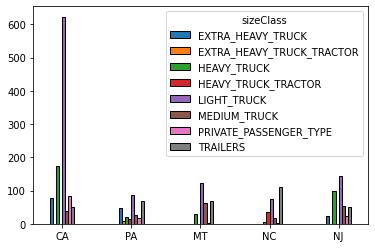

In [679]:
ta4[ta4.columns.tolist()[1:]].plot(kind='bar', width = width)
ax = plt.gca()
ax.set_xticklabels(topStates, rotation=0)
plt.show()

# According to this chart, we can see that there is a substantial gap between CA - the city with the highest quotes YTD - than the rest and as expected it has a higher variance
# of classSize than other cities. PA and NJ also have a good variance in classSize as they have 8 and 7 different classes respectively with MT having the least. Overall, there
# is little difference between the class makeups between the top 5 states.